In [1]:
!pip install pandas numpy scikit-learn nltk matplotlib seaborn


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
from google.colab import files
uploaded = files.upload()


Saving True.csv.zip to True.csv.zip
Saving Fake.csv.zip to Fake.csv.zip


In [5]:
import zipfile

# Unzip True.csv.zip
with zipfile.ZipFile("True.csv.zip", "r") as zip_ref:
    zip_ref.extractall()

# Unzip Fake.csv.zip
with zipfile.ZipFile("Fake.csv.zip", "r") as zip_ref:
    zip_ref.extractall()


In [6]:
import pandas as pd

# Load both datasets
fake_df = pd.read_csv("Fake.csv")
real_df = pd.read_csv("True.csv")

# Add labels: 0 for fake, 1 for real
fake_df["label"] = 0
real_df["label"] = 1

# Combine them
df = pd.concat([fake_df, real_df], ignore_index=True)

# Preview the data
df.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
# Check for missing values
print(df.isnull().sum())

# Check class balance
print(df["label"].value_counts())


title      0
text       0
subject    0
date       0
label      0
dtype: int64
label
0    23481
1    21417
Name: count, dtype: int64


In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [9]:
def clean_text(text):
    tokens = text.lower().split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [10]:
df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()


,text,clean_text
0,Donald Trump just couldn t wish all Americans ...,donald trump wish american happy new year leav...
1,House Intelligence Committee Chairman Devin Nu...,house intelligence committee chairman devin nu...
2,"On Friday, it was revealed that former Milwauk...","friday, revealed former milwaukee sheriff davi..."
3,"On Christmas day, Donald Trump announced that ...","christmas day, donald trump announced would ba..."
4,Pope Francis used his annual Christmas Day mes...,pope francis used annual christmas day message...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [12]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])


In [13]:
y = df['label']


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [16]:
y_pred = model.predict(X_test)


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



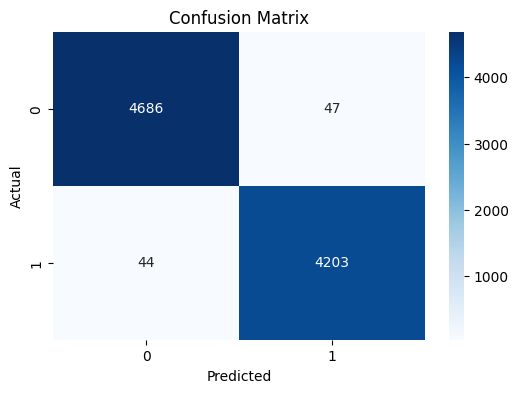

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
